# Data Exploration

## Downloading the data

Our dataset is from huggingface.co. So we can install it using their library in python itself. 
But below provided are also a set of links to download the data or instructions on the setup environment off the internet

### Link to dataset: [civil_comments](https://huggingface.co/datasets/google/civil_comments)

### Links to setup environment for this project:

- [__Python 3.9__](https://www.python.org/downloads/)
- [__numpy__](https://numpy.org/install/)
- [__matplotlib__](https://matplotlib.org/stable/users/index.html)
- [__seaborn__](https://seaborn.pydata.org/installing.html)
- [__scikit-learn__](https://scikit-learn.org/stable/install.html)
- [__datasets__](https://pypi.org/project/datasets/)

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.naive_bayes import MultinomialNB
from sklearn.metrics import classification_report, f1_score, accuracy_score, confusion_matrix
import re

In [2]:
from datasets import load_dataset

dataset = load_dataset("google/civil_comments")

In [3]:
print(dataset)

DatasetDict({
    train: Dataset({
        features: ['text', 'toxicity', 'severe_toxicity', 'obscene', 'threat', 'insult', 'identity_attack', 'sexual_explicit'],
        num_rows: 1804874
    })
    validation: Dataset({
        features: ['text', 'toxicity', 'severe_toxicity', 'obscene', 'threat', 'insult', 'identity_attack', 'sexual_explicit'],
        num_rows: 97320
    })
    test: Dataset({
        features: ['text', 'toxicity', 'severe_toxicity', 'obscene', 'threat', 'insult', 'identity_attack', 'sexual_explicit'],
        num_rows: 97320
    })
})


In [4]:
print("Number of observations in training data:",len(dataset["train"]),"\n")
print("Number of observations in test data:",len(dataset["test"]),"\n")
print("Number of observations in validation data:", len(dataset["validation"]), "\n")
print("Total number of observations:", len(dataset["train"]) + len(dataset["test"]) + len(dataset["validation"]),"\n")

Number of observations in training data: 1804874 

Number of observations in test data: 97320 

Number of observations in validation data: 97320 

Total number of observations: 1999514 



From the entire dataset, we have a total of __1,999,514__ observations.
We will edit our train dataset however

In [5]:
df_train = dataset["train"].to_pandas()

In [6]:
features = df_train.columns.tolist()

In [7]:
print(features, "\n")

['text', 'toxicity', 'severe_toxicity', 'obscene', 'threat', 'insult', 'identity_attack', 'sexual_explicit'] 



### There are a total of __8__ features in this dataset.

### text, toxicity, severe_toxicity, obscene, threat, insult, identity_attack, sexual_explicit


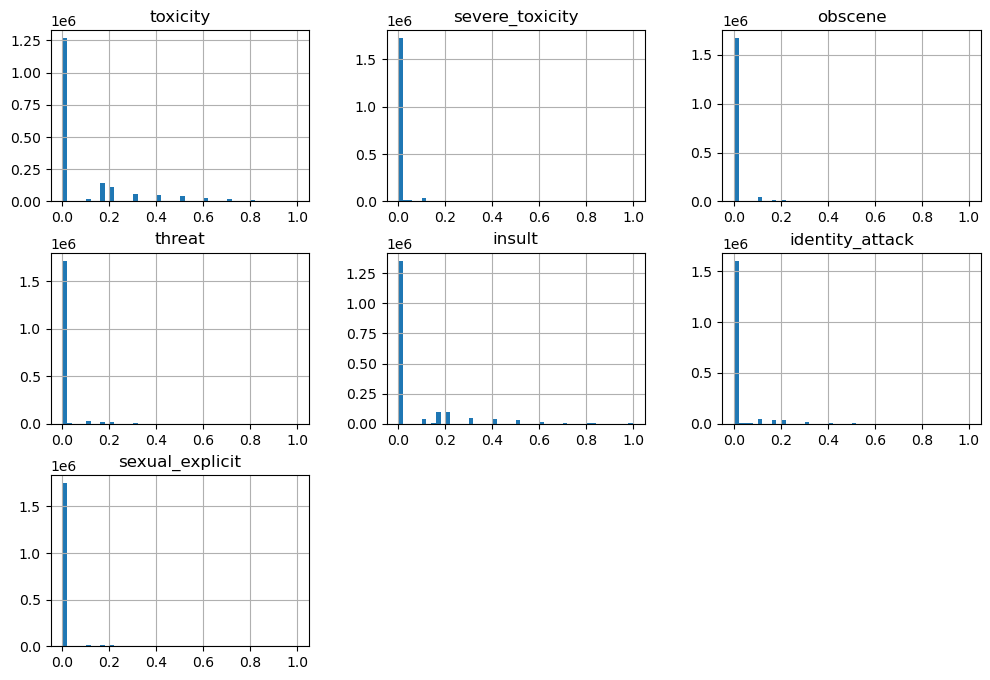

In [8]:
df_train[features].hist(bins=50, figsize=(12,8))
plt.show()

In [9]:
df_train[features].describe()

,toxicity,severe_toxicity,obscene,threat,insult,identity_attack,sexual_explicit
count,1.804874e+06,1.804874e+06,1.804874e+06,1.804874e+06,1.804874e+06,1.804874e+06,1.804874e+06
mean,1.030173e-01,4.582100e-03,1.387721e-02,9.311274e-03,8.115274e-02,2.263572e-02,6.605973e-03
std,1.971960e-01,2.270813e-02,6.410343e-02,4.904731e-02,1.767215e-01,7.920368e-02,4.496850e-02
min,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00
25%,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00
50%,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00
75%,1.666667e-01,0.000000e+00,0.000000e+00,0.000000e+00,9.090909e-02,0.000000e+00,0.000000e+00
max,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00


In [10]:
df_train.dtypes

text                object
toxicity           float32
severe_toxicity    float32
obscene            float32
threat             float32
insult             float32
identity_attack    float32
sexual_explicit    float32
dtype: object

### FEATURE DESCRIPTIONS 

There is a column labeled _text_ which is of type string. This is the statement which is ranked by the 7 features.

The rest of the features are _toxicity_, _severe_toxicity_, _obscene_, _threat_, _insult_, _identity_attack_, _sexual_explicit_

These features are all of float type. From the histogram's x values we can see that all the values are between a range from 0 to 1.

This means that in each column, the features are assigned a percentage of what people believe that text fits in. 

In [11]:
# Count of observations with all labels set to 0
target_columns = ['toxicity', 'severe_toxicity', 'obscene', 'threat', 'insult', 'identity_attack', 'sexual_explicit'] 
(df_train[target_columns] > 0).sum()

toxicity           540110
severe_toxicity    104636
obscene            147175
threat             106929
insult             454539
identity_attack    218552
sexual_explicit     68926
dtype: int64

As we can see, most entries in this data are non hateful regular comments with everything set to 0. Thus, we will remove most of these when training our model to handle this data imbalance.

#### EXTRACTING NULL FEATURES

In [12]:
df_train[features].isnull().sum()

text               0
toxicity           0
severe_toxicity    0
obscene            0
threat             0
insult             0
identity_attack    0
sexual_explicit    0
dtype: int64

There are no null values 

#### EXTRACTING DUPLICATE ENTRIES

In [13]:
df_train['text'].duplicated().sum()

24051

Number of duplicated observations is 24051. We will drop all these duplicates to avoid future issues. 

In [14]:
df_train = df_train.drop_duplicates(subset=['text'])

In [15]:
df_train['text'].duplicated().sum()

0

Now the number of duplicated observations is 0

### DATA PLOTS

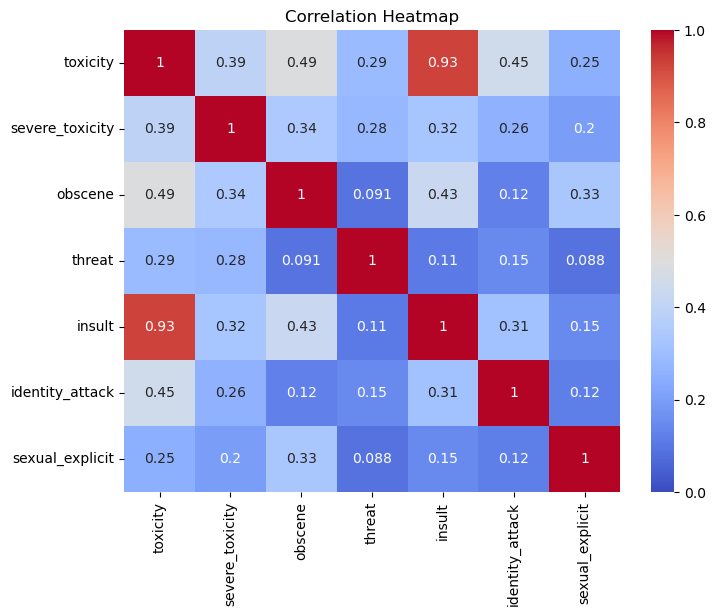

In [16]:
df_train_heatmap = df_train.copy()
df_train_heatmap = df_train_heatmap.drop(columns = ["text"])
plt.figure(figsize=(8,6))
corr = df_train_heatmap.corr()
sns.heatmap(corr, annot=True, cmap="coolwarm", vmin = 0, vmax = 1)
plt.title("Correlation Heatmap")
plt.show()

This correlation heatmap tells us that toxicity and insult have a strong correlation. The sexual explicit has the least correlations with the features. This tells us that sexual explicit would not be a good feature to train with. 

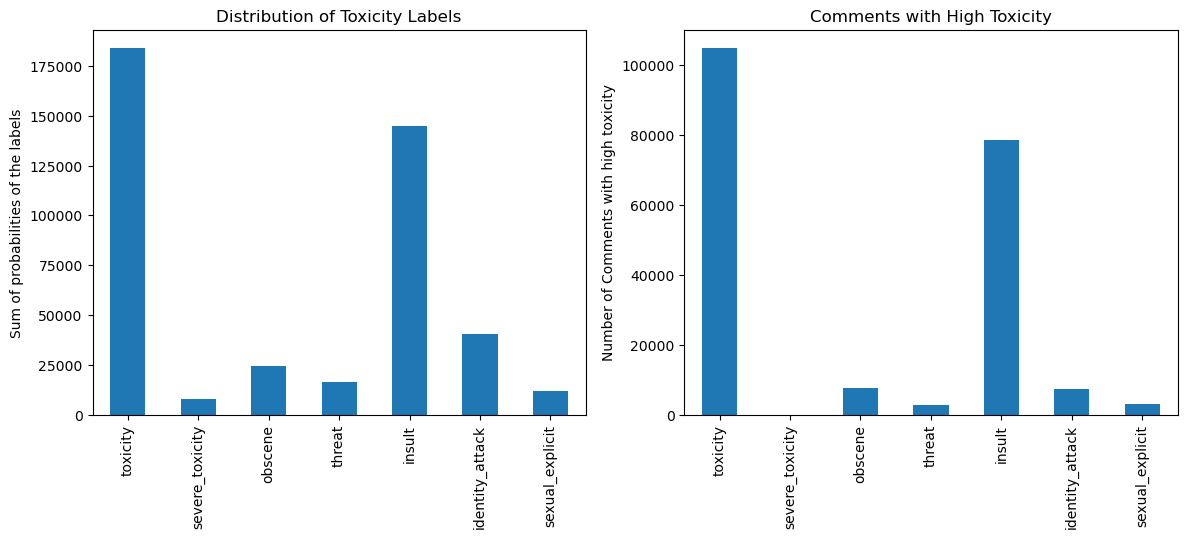

In [17]:

fig, ax = plt.subplots(1, 2, figsize=(14, 5))
# Sum of the total probabilities of the labels
df_train[target_columns].sum().plot(kind='bar', ax=ax[0])
ax[0].set_ylabel("Sum of probabilities of the labels")
ax[0].set_title("Distribution of Toxicity Labels")

# Number of comments above 0.5 for each label
(df_train[target_columns] > 0.5).sum().plot(kind='bar', ax=ax[1])
ax[1].set_ylabel("Number of Comments with high toxicity")
ax[1].set_title("Comments with High Toxicity")

plt.show()

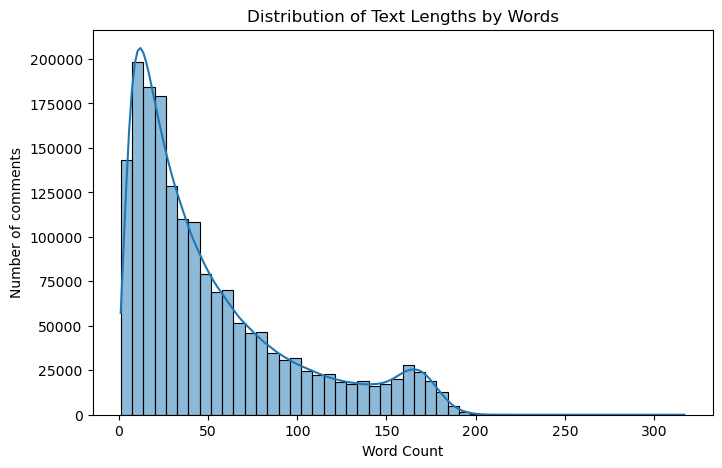

In [18]:
df_train['text_length'] = df_train['text'].str.split().str.len()
plt.figure(figsize = (8,5))
sns.histplot(df_train['text_length'], bins=50, kde = True)
plt.title("Distribution of Text Lengths by Words")
plt.xlabel("Word Count")
plt.ylabel("Number of comments")
plt.show()

In [19]:
print("Mean Word Count is : ", df_train['text_length'].mean(), "\n")
print("Standard Deviation is : ", df_train['text_length'].std())

Mean Word Count is :  51.690132595996346 

Standard Deviation is :  46.14809789802869


In [20]:
# Finding the most common word count
counts, bin_edges = np.histogram(df_train['text_length'], bins=50)

# Find the index of the maximum count
max_idx = np.argmax(counts)

# Compute the corresponding x-value (center of the bin)
x_max = (bin_edges[max_idx] + bin_edges[max_idx + 1]) / 2
print('Most common word count is:', x_max)

Most common word count is: 10.48


This histogram describes the word distribution in the dataset. From this plot, we can see that the comments range from 1 word to 317 words with the mean being ~52 and standard deviation being ~46. 
Most of the comments(~20,000) are around 10-25 words

1. Preprocessing and Feature Engineering

First, we will perform the necessary preprocessing steps to prepare the data for the Naive Bayes model. This includes:
1.  **Creating a Binary Target**: We will create a single toxic column (1 for toxic, 0 for non-toxic). A comment is considered toxic if any of its toxicity scores are > 0.5.
2.  **Balancing the Dataset**: To address the severe class imbalance, we will create a balanced dataset of 100,000 comments (50,000 toxic, 50,000 non-toxic).
3.  **Text Cleaning**: We will convert text to lowercase, remove special characters, and normalize whitespace.
4.  **Feature Engineering**: We will use TF-IDF for text vectorization and create additional numerical features like text length and word count.
5.  **Train-Validation Split**: The balanced data will be split into training and validation sets.

In [21]:
# --- Create a Binary Target and a Balanced Dataset ---
target_columns = ['toxicity', 'severe_toxicity', 'obscene', 'threat', 'insult', 'identity_attack', 'sexual_explicit']
df_train['toxic'] = (df_train[target_columns] > 0.5).any(axis=1).astype(int)

toxic_comments = df_train[df_train['toxic'] == 1]
non_toxic_comments = df_train[df_train['toxic'] == 0]

# Create a balanced dataset
non_toxic_sampled = non_toxic_comments.sample(n=50000, random_state=42)
toxic_sampled = toxic_comments.sample(n=50000, random_state=42)
df_balanced = pd.concat([toxic_sampled, non_toxic_sampled])

print("Balanced dataset created with:")
print(f"- {len(toxic_sampled)} toxic comments")
print(f"- {len(non_toxic_sampled)} non-toxic comments\n")

Balanced dataset created with:
- 50000 toxic comments
- 50000 non-toxic comments



In [22]:
# --- Text Preprocessing ---
def clean_text(text):
    text = text.lower()
    text = re.sub(r'[^a-z\s]', '', text)
    text = re.sub(r'\s+', ' ', text).strip()
    return text

df_balanced['cleaned_text'] = df_balanced['text'].apply(clean_text)
df_balanced.dropna(subset=['cleaned_text'], inplace=True)

# --- Train-Validation Split ---
X = df_balanced.drop('toxic', axis=1)
y = df_balanced['toxic']
X_train, X_val, y_train, y_val = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)

# --- Feature Engineering and Vectorization ---
# TF-IDF for text
tfidf = TfidfVectorizer(max_features=5000, ngram_range=(1, 2), min_df=5, max_df=0.8, stop_words='english')
X_train_text = tfidf.fit_transform(X_train['cleaned_text'])
X_val_text = tfidf.transform(X_val['cleaned_text'])

print("Feature matrix created with shape:", X_train_text.shape)


Feature matrix created with shape: (80000, 5000)



2. We will now train a MultinomialNB model, as it is well-suited for text classification tasks with TF-IDF features. We will evaluate its performance on both the training and validation sets.

In [23]:
# --- Model Training: Naive Bayes ---
nb_model = MultinomialNB(alpha=10.0)
nb_model.fit(X_train_text, y_train)

# --- Predictions ---
y_train_pred = nb_model.predict(X_train_text)
y_val_pred = nb_model.predict(X_val_text)

# --- Evaluation ---
train_acc = accuracy_score(y_train, y_train_pred)
val_acc = accuracy_score(y_val, y_val_pred)
train_f1 = f1_score(y_train, y_train_pred)
val_f1 = f1_score(y_val, y_val_pred)

print("--- Naive Bayes Model Performance ---")
print(f"Training Accuracy: {train_acc:.4f}, F1-Score: {train_f1:.4f}")
print(f"Validation Accuracy: {val_acc:.4f}, F1-Score: {val_f1:.4f}\n")
print("Validation Classification Report:\n", classification_report(y_val, y_val_pred))

--- Naive Bayes Model Performance ---
Training Accuracy: 0.8149, F1-Score: 0.8205
Validation Accuracy: 0.8039, F1-Score: 0.8113

Validation Classification Report:
               precision    recall  f1-score   support

           0       0.83      0.76      0.80     10000
           1       0.78      0.84      0.81     10000

    accuracy                           0.80     20000
   macro avg       0.81      0.80      0.80     20000
weighted avg       0.81      0.80      0.80     20000



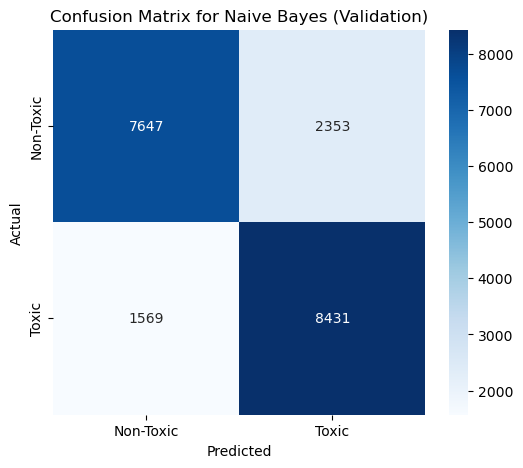

In [24]:
# --- Confusion Matrix ---
cm = confusion_matrix(y_val, y_val_pred)
plt.figure(figsize=(6, 5))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=['Non-Toxic', 'Toxic'], yticklabels=['Non-Toxic', 'Toxic'])
plt.title('Confusion Matrix for Naive Bayes (Validation)')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()

3. Hyperparameter Tuning for Naive Bayes `alpha`

The alpha parameter in Multinomial Naive Bayes is a smoothing parameter that helps to handle words not seen in the training data. A very small alpha can lead to overfitting, while a very large alpha can lead to underfitting. We will test a range of alpha values to see how they impact the F1-score on both the training and validation sets. This will help us find the best balance between bias and variance for this model.

Alpha: 0.01  | Train F1: 0.8215 | Validation F1: 0.8097
Alpha: 0.1   | Train F1: 0.8215 | Validation F1: 0.8096
Alpha: 0.5   | Train F1: 0.8212 | Validation F1: 0.8095
Alpha: 1.0   | Train F1: 0.8211 | Validation F1: 0.8096
Alpha: 5.0   | Train F1: 0.8211 | Validation F1: 0.8103
Alpha: 10.0  | Train F1: 0.8205 | Validation F1: 0.8113
Alpha: 20.0  | Train F1: 0.8199 | Validation F1: 0.8104
Alpha: 50.0  | Train F1: 0.8171 | Validation F1: 0.8101
Alpha: 100.0 | Train F1: 0.8151 | Validation F1: 0.8085
Alpha: 200.0 | Train F1: 0.8117 | Validation F1: 0.8061
Alpha: 500.0 | Train F1: 0.8057 | Validation F1: 0.8007
Alpha: 1000.0 | Train F1: 0.8017 | Validation F1: 0.7978


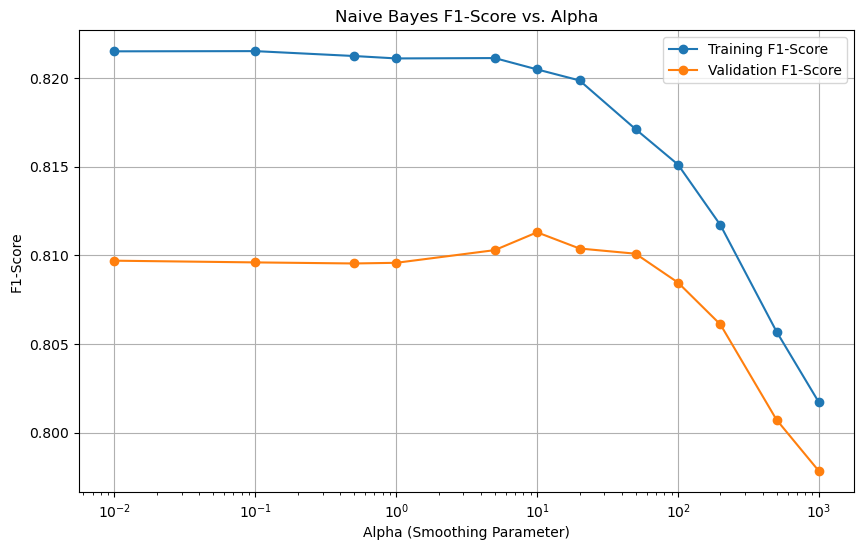

In [25]:
# --- Hyperparameter Tuning for alpha ---
alphas = [0.01, 0.1, 0.5, 1.0, 5.0, 10.0, 20.0, 50.0, 100.0, 200.0, 500.0, 1000.0]
train_f1_scores = []
val_f1_scores = []

for alpha in alphas:
    # Create and train the model
    nb_model_tuned = MultinomialNB(alpha=alpha)
    nb_model_tuned.fit(X_train_text, y_train)
    
    # Make predictions
    y_train_pred_tuned = nb_model_tuned.predict(X_train_text)
    y_val_pred_tuned = nb_model_tuned.predict(X_val_text)
    
    # Calculate F1 scores
    train_f1 = f1_score(y_train, y_train_pred_tuned)
    val_f1 = f1_score(y_val, y_val_pred_tuned)
    
    # Store the scores
    train_f1_scores.append(train_f1)
    val_f1_scores.append(val_f1)
    
    print(f"Alpha: {alpha:<5} | Train F1: {train_f1:.4f} | Validation F1: {val_f1:.4f}")

# --- Plot the results ---
plt.figure(figsize=(10, 6))
plt.plot(alphas, train_f1_scores, 'o-', label='Training F1-Score')
plt.plot(alphas, val_f1_scores, 'o-', label='Validation F1-Score')
plt.xscale('log')  # Use a log scale for alpha to better visualize the range
plt.title('Naive Bayes F1-Score vs. Alpha')
plt.xlabel('Alpha (Smoothing Parameter)')
plt.ylabel('F1-Score')
plt.legend()
plt.grid(True)
plt.show()

-   **Overfitting Zone (`alpha` < 10.0)**: At low alpha values, the training F1-score is high while the validation score is lower. The gap between the two lines indicates that the model is overfitting the training data.

-   **Underfitting Zone (`alpha` > 10.0)**: As the alpha value increases beyond 10.0, both the training and validation F1-scores begin to decline. This shows that the model is becoming too simple (overly smoothed) and is underfitting, failing to capture important patterns in the data.

-   **Optimal Alpha (`alpha` = 10.0)**: The validation F1-score reaches its peak at **`alpha = 10.0`**. This point represents the best balance between bias and variance, where the model generalizes best to new, unseen data. Therefore, this is the optimal hyperparameter for our Naive Bayes model.

Fitting 3 folds for each of 12 candidates, totalling 36 fits
[CV] END ..................clf__C=0.1, svd__n_components=300; total time=  36.8s
[CV] END ..................clf__C=0.1, svd__n_components=300; total time=  40.5s
[CV] END ..................clf__C=0.1, svd__n_components=300; total time=  40.5s
[CV] END ..................clf__C=0.1, svd__n_components=500; total time= 1.2min
[CV] END ..................clf__C=0.1, svd__n_components=500; total time= 1.2min
[CV] END ..................clf__C=0.1, svd__n_components=500; total time= 1.3min
[CV] END ....................clf__C=1, svd__n_components=300; total time=  37.6s
[CV] END ..................clf__C=0.1, svd__n_components=700; total time= 1.7min
[CV] END ..................clf__C=0.1, svd__n_components=700; total time= 1.8min
[CV] END ..................clf__C=0.1, svd__n_components=700; total time= 1.7min
[CV] END ....................clf__C=1, svd__n_components=300; total time=  32.6s
[CV] END ....................clf__C=1, svd__n_co

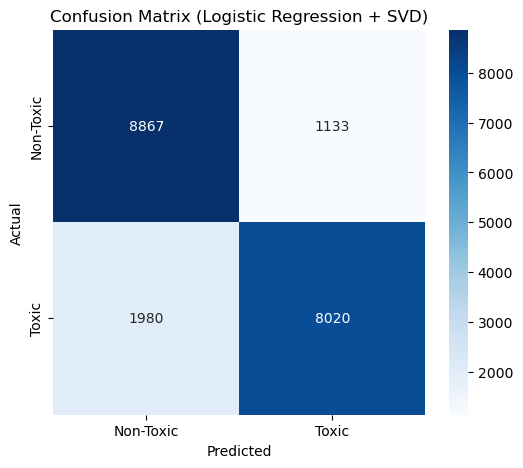

In [ ]:
import pandas as pd
import numpy as np
import re
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.decomposition import TruncatedSVD
from sklearn.linear_model import LogisticRegression
from sklearn.pipeline import Pipeline
from sklearn.metrics import accuracy_score, f1_score, classification_report, confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt

# --- Step 1: Preprocessing --- #
def clean_text(text):
    text = text.lower()
    text = re.sub(r'[^a-z\s]', '', text)
    text = re.sub(r'\s+', ' ', text).strip()
    return text

# df_balanced = pd.concat([toxic_sampled, non_toxic_sampled])
df_balanced['cleaned_text'] = df_balanced['text'].apply(clean_text)

# --- Step 2: Train-validation split --- #
X = df_balanced['cleaned_text']
y = df_balanced['toxic'].astype(int)  # ensure integers

X_train, X_val, y_train, y_val = train_test_split(
    X, y, test_size=0.2, random_state=42, stratify=y
)

# --- Step 3: Define pipeline --- #
pipeline = Pipeline([
    ("tfidf", TfidfVectorizer(max_features=5000, ngram_range=(1, 2), stop_words="english")),
    ("svd", TruncatedSVD(random_state=42)),
    ("clf", LogisticRegression(max_iter=3000, solver='lbfgs'))
])

# --- Step 4: Grid search for hyperparameters --- #
param_grid = {
    "svd__n_components": [300, 500, 700, 1000],
    "clf__C": [0.1, 1, 5]
}

grid = GridSearchCV(pipeline, param_grid, scoring="f1", cv=3, verbose=2, n_jobs=-1)

# --- Step 5: Fit model --- #
grid.fit(X_train, y_train)

print("Best parameters:", grid.best_params_)
print("Best cross-validated F1:", grid.best_score_)

# --- Step 6: Evaluate on training and validation --- #
y_train_pred = grid.predict(X_train)
y_val_pred = grid.predict(X_val)

train_acc = accuracy_score(y_train, y_train_pred)
val_acc = accuracy_score(y_val, y_val_pred)
train_f1 = f1_score(y_train, y_train_pred)
val_f1 = f1_score(y_val, y_val_pred)

print("\n--- Logistic Regression with SVD ---")
print(f"Training Accuracy: {train_acc:.4f}, F1-Score: {train_f1:.4f}")
print(f"Validation Accuracy: {val_acc:.4f}, F1-Score: {val_f1:.4f}\n")
print("Classification Report:\n", classification_report(y_val, y_val_pred))

# --- Step 7: Confusion Matrix --- #
cm = confusion_matrix(y_val, y_val_pred)
plt.figure(figsize=(6, 5))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues',
            xticklabels=['Non-Toxic', 'Toxic'],
            yticklabels=['Non-Toxic', 'Toxic'])
plt.title('Confusion Matrix (Logistic Regression + SVD)')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()